In [5]:
## IMPORT PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create dummy data and classifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# key metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# roc and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
# f score 
from sklearn.metrics import f1_score
import seaborn as sns




In [2]:

## CREATE DUMMY DATA 

data_X, class_label = make_classification(n_samples = 1000, n_features = 5, n_classes = 2) # generates a random n-class classification problem
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3) # creates training and test sets


## CREATE DESCISION TREE

model = DecisionTreeClassifier() 
model.fit(trainX, trainy)


## CREATE NEW PREDICTIONS

predictions = model.predict_proba(testX)[:, 1] 


<AxesSubplot:>

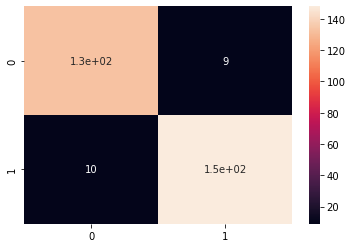

In [3]:

################# TASK 1 #################

## CALCULATE ACCURACY
accuracy_score(testy, predictions)

## CREATE CONFUSION MATRIX

cm = confusion_matrix(testy, predictions) # actual (testy) on y-axis, predictions on x-axis

sns.heatmap(cm, annot=True)



In [4]:

################# TASK 2 #################

## CALCUATE PRECISION, RECALL AND SPECIFICITY
TP = 1.5e+02
TN = 1.3e+02
FP = 9 # False Positive is when we predict 1 but actually get 0
FN = 10 # False Negative is when we predict 0 but actually get 1

precision = TP/(TP+FP)
recall = TP/(TP+FN) 
specificity = TN/(TN+FP)

print(precision) # 0.9433962264150944
print(recall) # 0.9375
print(specificity) # 0.935251798561151



0.9433962264150944
0.9375
0.935251798561151


Train/Test split results:
DecisionTreeClassifier accuracy is 0.937
DecisionTreeClassifier auc is 0.937


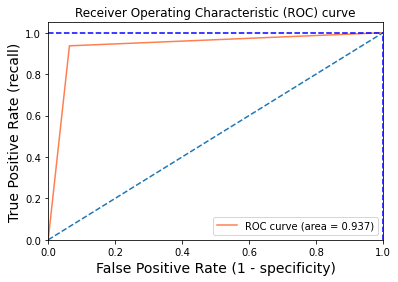

In [7]:

################# TASK 3 #################

## CALCULATE AUC (Area Under Curve)

## PLOT ROC (Receiver Operating Characteristic) CURVE

[FPR, TPR, thr] = roc_curve(testy, predictions) #FPR is False Positive Rate, TPR is True Positive Rate, thr is threshold
print('Train/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(testy, predictions))
print(model.__class__.__name__+" auc is %2.3f" % auc(FPR, TPR))

idx = np.min(np.where(TPR > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(FPR, TPR, color='coral', label='ROC curve (area = %0.3f)' % auc(FPR, TPR))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0,FPR[idx]], [TPR[idx],TPR[idx]], linestyle='--', color='blue')
plt.plot([FPR[idx],FPR[idx]], [0,TPR[idx]], linestyle='--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
################# TASK 4 #################

## CALCULATE F SCORE 

FScore = (2 * precision * recall)/(precision + recall)
print('F Score Manually Calculated: %f' %FScore)

fscore = f1_score(testy, predictions) # F-Score = (2 * precision * recall)/(precision + recall)
print('F Score Computed with f1_score: %f' %fscore)



F Score Manually Calculated: 0.940439
F Score Computed with f1_score: 0.939683


In [9]:
################# TASK 5 #################

data_X_mod2, class_label_mod2 = make_classification(n_samples = 1000, n_features = 5, n_classes = 2, flip_y = 0.5) 
trainX_mod2, testX_mod2, trainy_mod2, testy_mod2 = train_test_split(data_X_mod2, class_label_mod2, test_size=0.3)

model_mod2 = DecisionTreeClassifier() 
model_mod2.fit(trainX_mod2, trainy_mod2)

predictions_mod2 = model_mod2.predict_proba(testX_mod2)[:, 1] 


<AxesSubplot:>

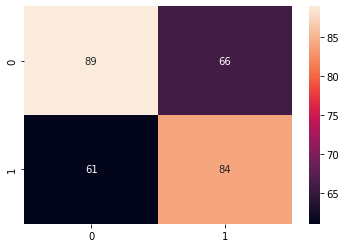

In [12]:
## CALCULATE ACCURACY
accuracy_score(testy_mod2, predictions_mod2)

## CREATE CONFUSION MATRIX

cm = confusion_matrix(testy_mod2, predictions_mod2) # actual (testy_mod2) on y-axis, predictions (predictions_mod2) on x-axis

sns.heatmap(cm, annot=True)

In [20]:
print(accuracy_score(testy_mod2, predictions_mod2))

0.5766666666666667


In [13]:
## CALCUATE PRECISION, RECALL AND SPECIFICITY
tp = 84
tn = 89
fp = 84 # False Positive is when we predict 1 but actually get 0
fn = 61 # False Negative is when we predict 0 but actually get 1

precision2 = tp/(tp+fp)
recall2 = tp/(tp+fn) 
specificity2 = tn/(tn+fp)

print(precision2) # 0.5
print(recall2) # 0.5793103448275863
print(specificity2) # 0.5144508670520231

0.5
0.5793103448275863
0.5144508670520231


Train/Test split results:
DecisionTreeClassifier accuracy is 0.577
DecisionTreeClassifier auc is 0.577


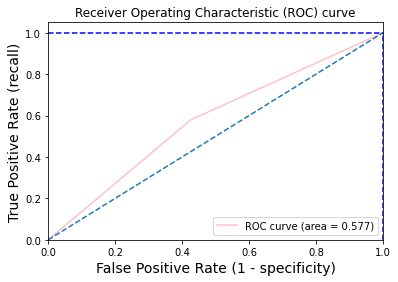

In [17]:
## CALCULATE AUC (Area Under Curve)

## PLOT ROC (Receiver Operating Characteristic) CURVE

[fpr, tpr, thr] = roc_curve(testy_mod2, predictions_mod2) #fpr is False Positive Rate, tpr is True Positive Rate, thr is threshold
print('Train/Test split results:')
print(model_mod2.__class__.__name__+" accuracy is %2.3f" % accuracy_score(testy_mod2, predictions_mod2))
print(model_mod2.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='pink', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], linestyle='--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], linestyle='--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
## CALCULATE F SCORE 

FScore2 = (2 * precision2 * recall2)/(precision2 + recall2)
print('F Score Manually Calculated: %f' %FScore2)

fscore2 = f1_score(testy_mod2, predictions_mod2) # F-Score = (2 * precision * recall)/(precision + recall)
print('F Score Computed with f1_score: %f' %fscore2)

F Score Manually Calculated: 0.536741
F Score Computed with f1_score: 0.569492


**Conclusion**  
All accuracy tests are summarised to 3 d.p as follows:
- General accuracy score (using accuracy_score): 0.577
- Precision (TP/TP+FP): 0.500
- Recall (TP/TP+FN): 0.579
- Specificity (TN/TN+FP): 0.514
- AUC (from ROC curve): 0.577
- Manual F Score: 0.537
- Compute F SCore: 0.570

Very hard to tell which model is best as they have produced pretty similar values. Either the tests with most similar accuracy values can be assumed best (as they 'support/corroborate/justify' each other's result) or the similar accuracy tests are all wrong and the test(s) with more unique results is/are better. Today I am presuming that tests with values closest to 0.577 represent the best accuracy tests as this score has appeared multiple times. 
*Assumed Ranks of 'Bestness'*
1. The General Accuracy test and AUC (from ROC curve)
2. Recall
3. Compute F Score
4. Manual F Score
5. Specificity
6. Precision 
 

